In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
###Set the tickers
tickers = ["AAPL", "TSLA"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Set start and end datetimes 
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-27", tz="America/New_York").isoformat()

# Get historical data 
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.tail(10)

AAPL                                         \
                               open      high       low    close    volume   
2020-08-14 00:00:00-04:00  459.3150  460.0000  452.1800  459.780  38149232   
2020-08-17 00:00:00-04:00  464.2500  464.3500  455.8501  458.390  25935894   
2020-08-18 00:00:00-04:00  457.4100  464.0000  456.0300  462.080  24276411   
2020-08-19 00:00:00-04:00  463.9330  468.6500  462.4400  462.825  33874948   
2020-08-20 00:00:00-04:00  463.0000  473.5680  462.9335  472.830  29389880   
2020-08-21 00:00:00-04:00  477.0500  499.4720  477.0000  497.400  79453112   
2020-08-24 00:00:00-04:00  505.6250  514.7809  495.7450  503.790  57811323   
2020-08-25 00:00:00-04:00  498.7900  500.7172  492.2100  499.310  49446300   
2020-08-26 00:00:00-04:00  504.7165  507.9700  500.3300  506.190  37949023   
2020-08-27 00:00:00-04:00  508.5700  509.9400  495.3300  500.040  36319905   

                              TSLA                                          
                              open     high        low     close    volume  
2020-08-14 00:00:00-04:00  1664.99  1668.80  1626.6400  1651.500  11738513  
2020-08-17 00:00:00-04:00  1677.00  1845.86  1672.8300  1835.860  19482112  
2020-08-18 00:00:00-04:00  1898.99  1923.90  1845.1100  1888.110  15300121  
2020-08-19 00:00:00-04:00  1865.00  1911.00  1841.2100  1879.000  11776286  
2020-08-20 00:00:00-04:00  1860.68  2021.99  1857.0600  2001.300  20432043  
2020-08-21 00:00:00-04:00  2044.76  2095.49  2025.0500  2050.000  20572968  
2020-08-24 00:00:00-04:00  2017.99  2062.49  1965.0000  2015.695  12452145  
2020-08-25 00:00:00-04:00  1974.89  2027.95  1968.0000  2024.090  10064998  
2020-08-26 00:00:00-04:00  2060.00  2166.00  2053.6292  2151.930  13768358  
2020-08-27 00:00:00-04:00  2180.46  2295.60  2142.5000  2239.760  22975743

In [5]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices["AAPL"] = df_ticker["AAPL"]["close"]
df_closing_prices["TSLA"] = df_ticker["TSLA"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

,AAPL,TSLA
2015-01-05,-0.027905,-0.041881
2015-01-06,-0.000188,0.005619
2015-01-07,0.014309,-0.001799
2015-01-08,0.038237,-0.001233
2015-01-09,0.001162,-0.018760
2015-01-12,-0.024643,-0.021249
2015-01-13,0.008971,0.010336
2015-01-14,-0.003901,-0.057318
2015-01-15,-0.026961,-0.004414
2015-01-16,-0.007957,0.006676


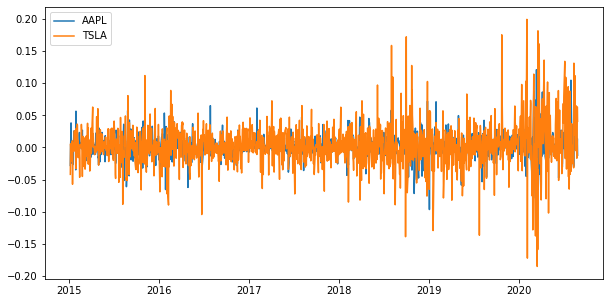

In [6]:
df_daily_returns.plot(figsize=(10,5))

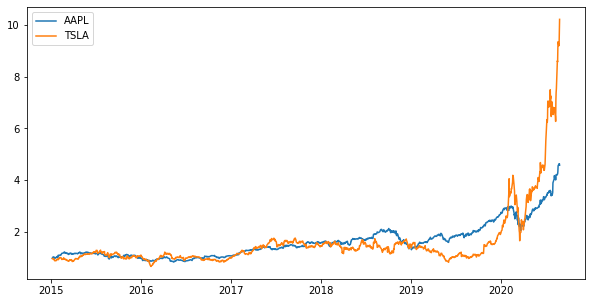

In [7]:
df_cumulative = (1 + df_daily_returns).cumprod()
df_cumulative.plot(figsize=(10,5))

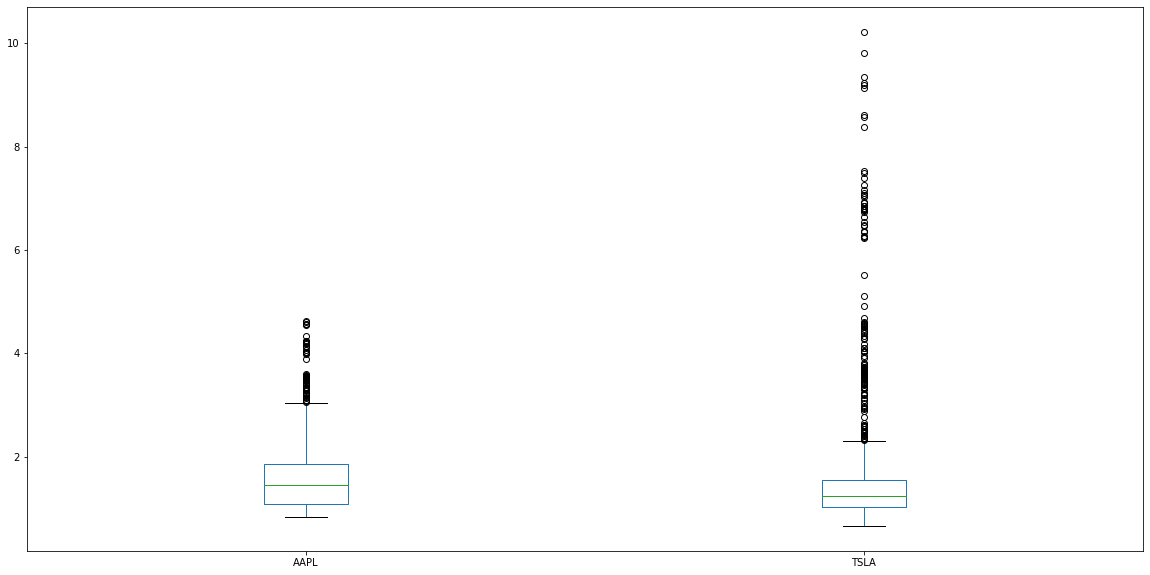

In [8]:
df_cumulative.plot.box(figsize=(20,10))

In [9]:
df_daily_returns.describe()

,AAPL,TSLA
count,1423.000000,1423.000000
mean,0.001236,0.002195
std,0.018284,0.033591
min,-0.131590,-0.185317
25%,-0.006414,-0.013582
50%,0.000987,0.000905
75%,0.009641,0.017352
max,0.121210,0.199545


In [10]:
# Create an empty DataFrame for closing prices
fiveyears_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
fiveyears_closing_prices["Jan/2015"] = df_closing_prices.iloc[0]
fiveyears_closing_prices["Aug/2020"] = df_closing_prices.iloc[-1]
fiveyears_closing_prices["% diff"] = (fiveyears_closing_prices["Aug/2020"] / fiveyears_closing_prices["Jan/2015"]) * 100

fiveyears_closing_prices

,Jan/2015,Aug/2020,% diff
AAPL,109.30,500.04,457.493138
TSLA,219.19,2239.76,1021.834938


In [11]:
 # Use the results to calculate the outcome of our initial $10,000 of investment in Apple and Tesla stocks
initial_investiment = 10000
aapl_fv = initial_investiment * (fiveyears_closing_prices.iloc[0,2] / 100)
tsla_fv = initial_investiment * (fiveyears_closing_prices.iloc[1,2] / 100)

# Print results
print(f"If you have invested ${initial_investiment} over 5 years in APPLE your balance would be ${aapl_fv}"
      f" but if you have invested in tesla instead your balance would be ${tsla_fv}")

If you have invested $10000 over 5 years in APPLE your balance would be $45749.31381518756 but if you have invested in tesla instead your balance would be $102183.49377252613


In [12]:
df_daily_returns.describe()

,AAPL,TSLA
count,1423.000000,1423.000000
mean,0.001236,0.002195
std,0.018284,0.033591
min,-0.131590,-0.185317
25%,-0.006414,-0.013582
50%,0.000987,0.000905
75%,0.009641,0.017352
max,0.121210,0.199545


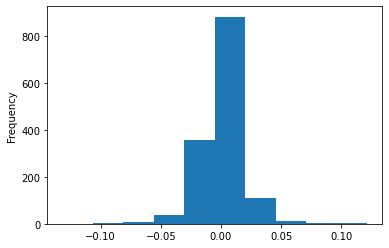

In [13]:
df_daily_returns["AAPL"].plot.hist()

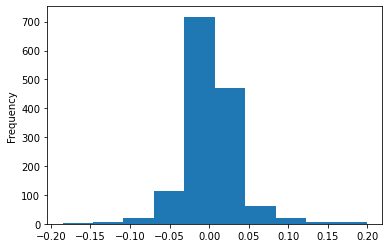

In [14]:
df_daily_returns["TSLA"].plot.hist()

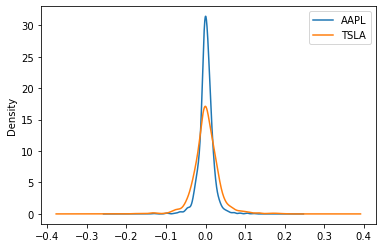

In [15]:
df_daily_returns.plot.density()

In [16]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.50, .50],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
MC.portfolio_data.head()

AAPL                                     \
                             open    high      low   close    volume   
2015-01-02 00:00:00-05:00  111.39  111.44  107.350  109.30  47045497   
2015-01-05 00:00:00-05:00  108.29  108.65  105.410  106.25  50146623   
2015-01-06 00:00:00-05:00  106.56  107.43  104.630  106.23  59441540   
2015-01-07 00:00:00-05:00  107.20  108.20  106.695  107.75  34452408   
2015-01-08 00:00:00-05:00  109.23  112.15  108.700  111.87  50255019   

                                          TSLA                              \
                          daily_return    open      high       low   close   
2015-01-02 00:00:00-05:00          NaN  222.87  223.2500  213.2600  219.19   
2015-01-05 00:00:00-05:00    -0.027905  214.55  216.5000  207.1626  210.01   
2015-01-06 00:00:00-05:00    -0.000188  210.06  214.2000  204.2100  211.19   
2015-01-07 00:00:00-05:00     0.014309  213.35  214.7800  209.7800  210.81   
2015-01-08 00:00:00-05:00     0.038237  212.81  213.7999  210.0100  210.55   

                                                 
                            volume daily_return  
2015-01-02 00:00:00-05:00  3943826          NaN  
2015-01-05 00:00:00-05:00  4577520    -0.041881  
2015-01-06 00:00:00-05:00  5383509     0.005619  
2015-01-07 00:00:00-05:00  2582044    -0.001799  
2015-01-08 00:00:00-05:00  2922730    -0.001233

In [17]:
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.036818,0.997256,1.001996,0.985729,0.988370,1.012638,1.012794,0.986641,1.000187,0.998290,...,1.036284,0.966895,1.002208,0.988381,1.012377,1.045794,0.973957,1.003292,0.989403,0.971626
2,1.036827,0.986424,1.028440,0.993376,0.975873,0.995908,1.003911,0.989148,0.986713,1.011005,...,1.051858,0.979689,0.993841,0.987517,1.041033,1.029836,0.963223,0.990360,1.016742,0.973732
3,1.023862,0.966091,1.061844,1.017310,0.990075,1.029695,1.032450,0.998631,0.978588,1.018426,...,1.051672,0.980215,1.014324,1.027264,1.021247,1.044193,0.957726,1.026780,1.032219,0.947890
4,1.024655,0.965848,1.040920,1.002512,1.014521,1.004473,1.059799,1.012973,0.956662,0.988224,...,1.052428,1.006768,1.030352,1.036757,1.017136,1.049296,0.952937,0.987169,1.005253,0.952130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.310766,7.536630,3.381878,18.823103,4.735936,9.021141,13.611768,33.623216,5.995665,3.060831,...,5.576034,8.681092,1.105151,8.818742,8.671455,6.227581,8.088314,7.857712,9.290463,10.566385
1257,1.346917,7.668409,3.218546,18.555101,4.751037,8.925260,13.445712,33.826615,6.013281,3.110214,...,5.570894,8.448834,1.113682,8.975085,8.654001,6.298189,8.360558,7.824638,9.261149,10.514988
1258,1.386676,7.648869,3.067880,18.698222,4.816868,8.839720,13.107819,34.830886,6.089966,3.074678,...,5.625605,8.539421,1.074206,9.053320,8.601702,6.361615,8.592572,7.859975,9.395162,10.803403
1259,1.416488,7.803186,3.008115,18.666044,4.860297,9.035895,13.141431,33.971978,5.993741,3.130348,...,5.415604,8.668106,1.075855,9.090466,8.517201,6.328817,8.220851,7.929474,9.558650,10.848750


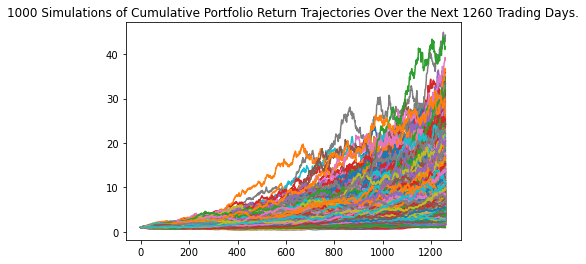

In [18]:
 # Plot simulation outcomes
line_plot = MC.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

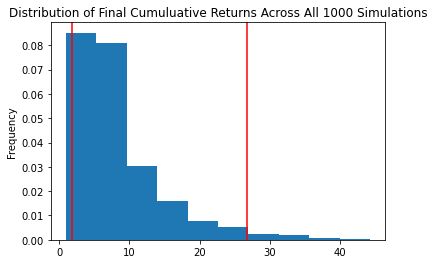

In [19]:
 # Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [20]:
 # Fetch summary statistics from the Monte Carlo simulation results
tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               8.484710
std                6.315112
min                0.951310
25%                4.229237
50%                6.807894
75%               10.348823
max               44.267948
95% CI Lower       1.900928
95% CI Upper      26.768159
Name: 1260, dtype: float64


In [21]:
 # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Apple and Tesla stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 5 years will end within in the range of $19009.28 and $267681.59
